In [3]:
# @title Parameters
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest
import pandas as pd
import bigframes.pandas as bf

bf.options.bigquery.location = "asia-southeast1" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "curious-pointer-419406" #this variable is set based on the dataset you chose to query

JobId = "job202404090913"

In [4]:
%%bigquery df --project curious-pointer-419406
SELECT * FROM patents_processed.thailand_dip_2_features WHERE JobId = "job202404090913"

Query is running:   0%|          |

Downloading:   0%|          |

In [5]:
df["ApplicationId"] = df["ApplicationId"].astype("int64")
df

,JobId,ApplicationId,Title,chemical,polymer,home_chemical,industrial_chemical,argriculture,automotive,bottle_caps,...,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process,products
0,job202404090913,101000350,การใช้ประโยชน์ไพริมิดินคาร์บอกซาไมด์ในฐานะเป็น...,True,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[pyrimidine carboxamide compounds]
1,job202404090913,101000067,สารประกอบฆ่าราชนิดใหม่,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[]
2,job202404090913,1801003839,สารประกอบเดพซิเพพไทด์ที่มีฤทธิ์ฆ่าพยาธิ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[]
3,job202404090913,8901001266,สารผสมสำหรับรักษาความสดของผลไม้และผัก,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[A mixture for preserving the freshness of fru...
4,job202404090913,1802000101,รถปลูกข้าว,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[rice planting vehicle]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,job202404090913,2101003616,<p>วิธีการสำหรับการผลิตเส้นใยสำหรับการเสริมแรง...,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,"[fiber for reinforcing rubber, thermoplastic e..."
15889,job202404090913,9601003960,สารผสมบิทูเมนและขบวนการเตรียม,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,"[bitumen composition, asphalt paving mixtures]"
15890,job202404090913,1901005124,ลามิเนต,True,True,False,True,True,True,False,...,False,False,False,False,True,False,False,True,True,"[Laminate, Pipe]"
15891,job202404090913,401000300,วัสดุเชิงแสง พอลิยูเรีย/ยูรีเธน และ วิธีการสำห...,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,"[impact-resistant, optically clear polyurethan..."


In [6]:
df_cluster = df.drop(columns=["JobId","Title", "products"])
df_cluster.fillna(False, inplace=True)
df_cluster = df_cluster.astype(int)

df_cluster


,ApplicationId,chemical,polymer,home_chemical,industrial_chemical,argriculture,automotive,bottle_caps,bottle,paint,...,home_appliances,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process
0,101000350,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101000067,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1801003839,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8901001266,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1802000101,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,2101003616,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15889,9601003960,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15890,1901005124,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
15891,401000300,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df_cluster_indexed = df_cluster.set_index("ApplicationId")
df_cluster_indexed.index

Int64Index([ 101000350,  101000067, 1801003839, 8901001266, 1802000101,
            8901000642,  601006216,  602000654, 2002001504,  501002901,
            ...
            9301001444, 2001006745, 1601002890, 1601001487, 9901003680,
            2101003616, 9601003960, 1901005124,  401000300, 9701002868],
           dtype='int64', name='ApplicationId', length=15893)

In [8]:
# @title Getting Embeddings { display-mode: "both" }

%%bigquery df_embeddings --project curious-pointer-419406
SELECT
  CAST(ApplicationId As STRING) As ApplicationId,
  SummaryEmbedding
FROM `curious-pointer-419406.patents_processed.thailand_dip_3_embeddings`
WHERE ARRAY_LENGTH(SummaryEmbedding) = 768

Query is running:   0%|          |

Downloading:   0%|          |

In [9]:
# @title Explode the Embedding Features into columns
df_embeddings_exp = df_embeddings.explode('SummaryEmbedding')

df_embeddings_exp['row_id'] = df_embeddings_exp.groupby('ApplicationId').cumcount()

pivot_df = df_embeddings_exp.pivot(index='ApplicationId', columns='row_id', values='SummaryEmbedding')

pivot_df = pivot_df = pivot_df.iloc[:, :768]
pivot_df.index = pivot_df.index.astype("int64")
pivot_df.columns = pivot_df.columns.astype("str")

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 32 components
embedding_pca = PCA(n_components=32)
scaled_df_pca = embedding_pca.fit_transform(pivot_df)

embedding_pca_scaler = MinMaxScaler()
scaled_df_pca = embedding_pca_scaler.fit_transform(scaled_df_pca)
scaled_df_pca = pd.DataFrame(scaled_df_pca, index=pivot_df.index)
scaled_df_pca

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
ApplicationId,,,,,,,,,,,,,,,,,,,,,
1000001,0.193157,0.203137,0.462736,0.404145,0.409519,0.555262,0.281087,0.656102,0.568264,0.436490,...,0.511774,0.309759,0.628274,0.383445,0.388543,0.614340,0.650470,0.511536,0.364435,0.505832
1000005,0.281474,0.633354,0.490040,0.452803,0.356874,0.285736,0.658750,0.821971,0.645467,0.608143,...,0.400194,0.407705,0.482482,0.744002,0.246158,0.323162,0.432085,0.310572,0.437699,0.265753
1000014,0.333956,0.163289,0.538659,0.310381,0.269610,0.544542,0.556297,0.275672,0.626152,0.426688,...,0.290807,0.386133,0.150392,0.409472,0.427278,0.610575,0.503210,0.498612,0.620484,0.460588
1000030,0.379313,0.824242,0.236152,0.276829,0.345319,0.669986,0.566442,0.334539,0.735802,0.634111,...,0.466251,0.487909,0.294924,0.502594,0.418139,0.542163,0.567502,0.593297,0.529767,0.468737
1000098,0.325650,0.172151,0.663801,0.610447,0.603751,0.551745,0.508984,0.654219,0.618703,0.522626,...,0.509814,0.556858,0.326217,0.348990,0.567242,0.597865,0.415253,0.637413,0.714857,0.508125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903000032,0.462622,0.547204,0.763687,0.712401,0.250862,0.456956,0.540265,0.711672,0.408459,0.572865,...,0.549524,0.609142,0.391328,0.495863,0.633402,0.422820,0.564206,0.518843,0.509532,0.471673
9903000053,0.511982,0.595512,0.886037,0.485227,0.417681,0.418482,0.393968,0.680272,0.533431,0.648571,...,0.549530,0.504899,0.466773,0.359644,0.234394,0.431343,0.514055,0.616382,0.253735,0.568402
9903000102,0.576678,0.498006,0.348866,0.548975,0.717178,0.618477,0.565511,0.559396,0.503726,0.397352,...,0.710331,0.623102,0.502654,0.564883,0.313304,0.357027,0.504876,0.354157,0.401023,0.597790


In [11]:
df_cluster_indexed_boost = df_cluster_indexed.copy()
df_cluster_indexed_boost["polymer"] = df_cluster_indexed_boost["polymer"] * 1.5
df_cluster_indexed_boost["chemical"] = df_cluster_indexed_boost["chemical"] * -1.5
df_cluster_indexed_boost

,chemical,polymer,home_chemical,industrial_chemical,argriculture,automotive,bottle_caps,bottle,paint,coating,home_appliances,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process
ApplicationId,,,,,,,,,,,,,,,,,,,,
101000350,-1.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101000067,-0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1801003839,-0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8901001266,-1.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1802000101,-0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101003616,-1.5,1.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9601003960,-1.5,1.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1901005124,-1.5,1.5,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [12]:
df_merged_cluster = pd.merge(scaled_df_pca, df_cluster_indexed_boost, left_index=True, right_index=True, how="inner")
df_merged_cluster.columns = df_merged_cluster.columns.astype(str)
df_merged_cluster

,0,1,2,3,4,5,6,7,8,9,...,home_appliances,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process
ApplicationId,,,,,,,,,,,,,,,,,,,,,
1000001,0.193157,0.203137,0.462736,0.404145,0.409519,0.555262,0.281087,0.656102,0.568264,0.436490,...,0,0,0,0,0,0,0,0,1,1
1000005,0.281474,0.633354,0.490040,0.452803,0.356874,0.285736,0.658750,0.821971,0.645467,0.608143,...,0,0,0,0,0,0,0,0,1,1
1000014,0.333956,0.163289,0.538659,0.310381,0.269610,0.544542,0.556297,0.275672,0.626152,0.426688,...,0,0,0,0,0,0,0,0,1,1
1000030,0.379313,0.824242,0.236152,0.276829,0.345319,0.669986,0.566442,0.334539,0.735802,0.634111,...,0,0,0,0,0,0,1,0,0,0
1000098,0.325650,0.172151,0.663801,0.610447,0.603751,0.551745,0.508984,0.654219,0.618703,0.522626,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903000032,0.462622,0.547204,0.763687,0.712401,0.250862,0.456956,0.540265,0.711672,0.408459,0.572865,...,1,0,0,0,0,0,0,0,0,1
9903000053,0.511982,0.595512,0.886037,0.485227,0.417681,0.418482,0.393968,0.680272,0.533431,0.648571,...,1,0,0,0,0,0,0,0,0,0
9903000102,0.576678,0.498006,0.348866,0.548975,0.717178,0.618477,0.565511,0.559396,0.503726,0.397352,...,0,0,0,0,0,0,0,0,0,0


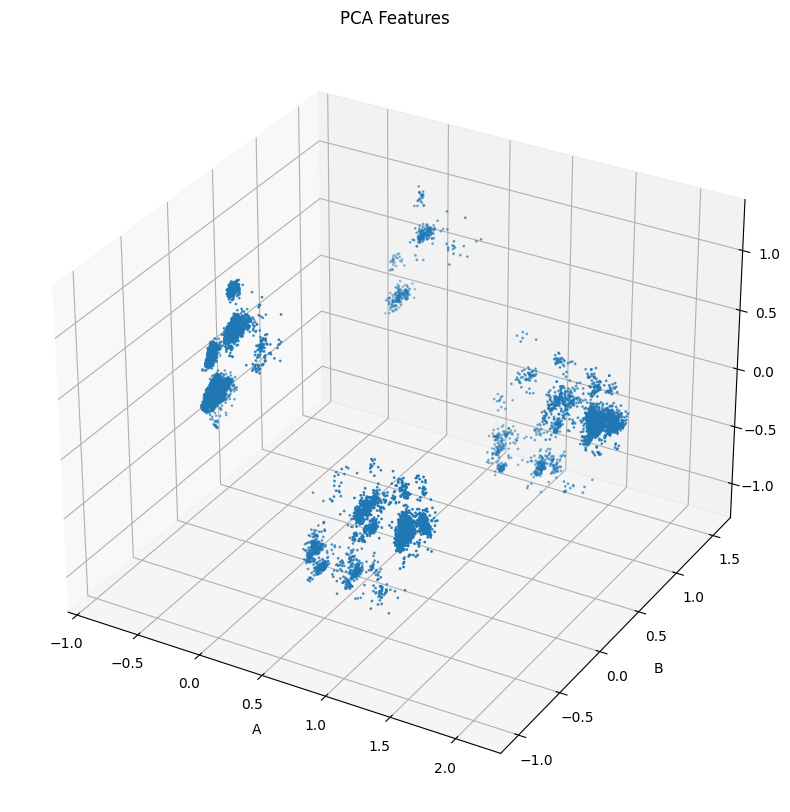

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA to reduce dimensionality to 3 components
visualization_pca = PCA(n_components=3)
pca_3 = visualization_pca.fit_transform(df_merged_cluster)

# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], s=1)

# Set labels and title
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_title('PCA Features')

# Show plot
plt.show()

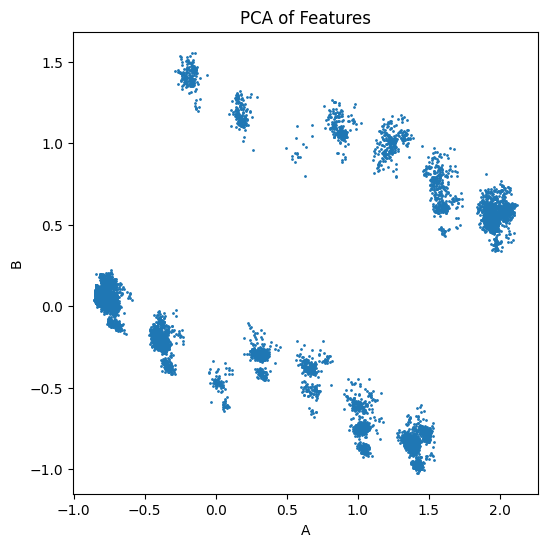

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(df_merged_cluster)

# Create 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(pca_2[:, 0], pca_2[:, 1], s=1)

# Set labels and title
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_title('PCA of Features')

# Show plot
plt.show()

In [15]:
# @title Vanilla DBSCAN over df_merged_cluster - DOES NOT WORK if using Embedding Directly

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Define range of epsilon and minimum samples values to evaluate
eps_range = [0.7,0.8,0.9,0.95,0.98] #good before PCA to 3
min_samples_range = [5,7,10,12,15]
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# Initialize variables to keep track of the best performing DBSCAN instance and its silhouette score
best_dbscan = None
best_silhouette_score = -1
best_outliers = 99999999
best_labels = None

# Compute silhouette scores for each combination of hyperparameters
print("Vanilla DBSCAN")
i = 0;
for eps in eps_range:
    j = 0
    for min_samples in min_samples_range:
        print( f"Hyper Parameters: {eps}, {min_samples}")

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df_merged_cluster)

        num_clusters = len(np.unique(cluster_labels[cluster_labels != -1]))
        num_outliers = (cluster_labels == -1).sum()
        print(f"> Clusters: {num_clusters}")
        print(f"> Outliers: {num_outliers}")

        if num_clusters > 1:
          silhouette = silhouette_score(df_merged_cluster, cluster_labels)
        else:
          silhouette = -1

        silhouette_scores[i, j] = silhouette
        j = j + 1

        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_dbscan = dbscan
            best_labels = cluster_labels
            print("New Best")

    i = i + 1


Vanilla DBSCAN
Hyper Parameters: 0.7, 5
> Clusters: 102
> Outliers: 3076
New Best
Hyper Parameters: 0.7, 7
> Clusters: 79
> Outliers: 3464
Hyper Parameters: 0.7, 10
> Clusters: 61
> Outliers: 4001
Hyper Parameters: 0.7, 12
> Clusters: 45
> Outliers: 4416
Hyper Parameters: 0.7, 15
> Clusters: 40
> Outliers: 4694
Hyper Parameters: 0.8, 5
> Clusters: 112
> Outliers: 1561
New Best
Hyper Parameters: 0.8, 7
> Clusters: 90
> Outliers: 1807
Hyper Parameters: 0.8, 10
> Clusters: 72
> Outliers: 2087
Hyper Parameters: 0.8, 12
> Clusters: 64
> Outliers: 2273
Hyper Parameters: 0.8, 15
> Clusters: 59
> Outliers: 2465
Hyper Parameters: 0.9, 5
> Clusters: 135
> Outliers: 975
New Best
Hyper Parameters: 0.9, 7
> Clusters: 104
> Outliers: 1183
Hyper Parameters: 0.9, 10
> Clusters: 85
> Outliers: 1388
Hyper Parameters: 0.9, 12
> Clusters: 77
> Outliers: 1498
Hyper Parameters: 0.9, 15
> Clusters: 68
> Outliers: 1667
Hyper Parameters: 0.95, 5
> Clusters: 147
> Outliers: 808
New Best
Hyper Parameters: 0.95, 

In [19]:
# @title Save Model to GCS

from google.cloud import storage
import pickle
import json

dbscan_file = 'model__patent_cluster_dbscan.pkl'
embedding_pca_file = 'model__patent_cluster_embeddingpca.pkl'
embedding_pca_scaler_file = 'model__patent_cluster_embeddingscaler.pkl'
visualization_pca_file = 'model__patent_cluster_visualizationpca.pkl'

with open(dbscan_file, 'wb') as f:
    pickle.dump(best_dbscan, f)

with open(embedding_pca_file, 'wb') as f:
    pickle.dump(embedding_pca, f)

with open(embedding_pca_scaler_file, 'wb') as f:
    pickle.dump(embedding_pca_scaler, f)

with open(visualization_pca_file, 'wb') as f:
    pickle.dump(visualization_pca, f)

storageClient = storage.Client()

bucket = storageClient.get_bucket('prat-config-public')

gcs_dbscan_file = dbscan_file.replace('model__', 'model/')
gcs_embedding_pca_file = embedding_pca_file.replace('model__', 'model/')
gcs_embedding_pca_scaler_file = embedding_pca_scaler_file.replace('model__', 'model/')
gcs_visualization_pca_file = visualization_pca_file.replace('model__', 'model/')

bucket.blob(gcs_embedding_pca_file).upload_from_filename(embedding_pca_file, content_type='application/octet-stream')
bucket.blob(gcs_embedding_pca_scaler_file).upload_from_filename(embedding_pca_scaler_file, content_type='application/octet-stream')
bucket.blob(gcs_visualization_pca_file).upload_from_filename(visualization_pca_file, content_type='application/octet-stream')
bucket.blob(gcs_dbscan_file).upload_from_filename(dbscan_file, content_type='application/octet-stream')

scaler_minmax = {
    "min" : embedding_pca_scaler.data_min_.tolist(),
    "max" : embedding_pca_scaler.data_max_.tolist()
}
bucket.blob('model__scaler_minmax.json').upload_from_string(json.dumps(scaler_minmax), content_type='application/octet-stream')

In [18]:
cluster_labels_df = pd.DataFrame(best_labels, columns=['Cluster'])

df_final = pd.DataFrame(df_merged_cluster.index)

df_final = pd.concat( [df_final, cluster_labels_df], axis=1)
df_final.index = df_final["ApplicationId"]

df_final["pca_3"] = [row.tolist() for row in pca_3]
df_final["JobId"] = JobId

df_final

,ApplicationId,Cluster,pca_3,JobId
ApplicationId,,,,
1000001,1000001,0,"[1.9675441890334375, 0.5308223026963639, 0.150...",job202404090913
1000005,1000005,1,"[0.009567984824460269, -0.48503093796867536, 0...",job202404090913
1000014,1000014,2,"[1.379306386734807, -0.8618403321309781, -0.09...",job202404090913
1000098,1000098,3,"[2.06335812630556, 0.41925772019279084, 0.1269...",job202404090913
1000116,1000116,4,"[1.9661206351575713, 0.40432125326844004, 0.14...",job202404090913
...,...,...,...,...
9903000032,9903000032,48,"[-0.4260879702467126, -0.25283740153492923, 0....",job202404090913
9903000053,9903000053,12,"[-0.7882481260392085, -0.02120431258132981, -0...",job202404090913
9903000102,9903000102,10,"[-0.18707086486307187, 1.4002224709091486, 0.0...",job202404090913


In [ ]:
grouped_df = df_final.groupby('Cluster')['ApplicationId'].apply(list).reset_index()
grouped_df

,Cluster,ApplicationId
0,-1,"[1000157, 1000450, 1001079, 1001232, 1001790, ..."
1,0,"[1000001, 1000191, 1000714, 1000858, 1000872, ..."
2,1,"[1000005, 1002170, 201000672, 203000709, 30100..."
3,2,"[1000014, 1000535, 1000546, 1000789, 1000809, ..."
4,3,"[1000098, 501004817, 1101001153, 1601006107, 1..."
...,...,...
150,149,"[301001332, 1801001618, 8201000193, 8901000279..."
151,150,"[701004581, 701004925, 801001610, 8501000466, ..."
152,151,"[303000920, 1501006002, 1603000832, 1603002137..."
153,152,"[601002560, 2001003618, 9601000228, 9601004231..."


In [ ]:
cluster_centroids = []

for index, row in grouped_df.iterrows():
  patent_pca_list = []
  for item in list(set(row["ApplicationId"])):
    matching = df_final.loc[item]["pca_3"]
    if isinstance(matching, pd.Series):
      patent_pca_list.append( matching.iloc[0] )
    else:
      patent_pca_list.append( matching )

  array_3d = np.array(patent_pca_list)
  centroid = np.mean(array_3d, axis=0)
  cluster_centroids.append(centroid)

grouped_df["ClusterCentoid"] = cluster_centroids
grouped_df

,Cluster,ApplicationId,ClusterCentoid
0,-1,"[1000157, 1000450, 1001079, 1001232, 1001790, ...","[0.7487817047872128, 0.2500674434177802, 0.059..."
1,0,"[1000001, 1000191, 1000714, 1000858, 1000872, ...","[1.9487302783296292, 0.5226170789834418, 0.150..."
2,1,"[1000005, 1002170, 201000672, 203000709, 30100...","[0.012054150760400412, -0.4670611914740329, 0...."
3,2,"[1000014, 1000535, 1000546, 1000789, 1000809, ...","[1.3839720557591824, -0.850017406851726, -0.01..."
4,3,"[1000098, 501004817, 1101001153, 1601006107, 1...","[2.0673919865626704, 0.4326551278011378, 0.141..."
...,...,...,...
150,149,"[301001332, 1801001618, 8201000193, 8901000279...","[0.9774390918979288, -0.5980247514800902, -0.0..."
151,150,"[701004581, 701004925, 801001610, 8501000466, ...","[1.9100287564436351, 0.6836877056283496, 0.114..."
152,151,"[303000920, 1501006002, 1603000832, 1603002137...","[-0.319482309572723, -0.28455603017840103, 0.6..."
153,152,"[601002560, 2001003618, 9601000228, 9601004231...","[1.2267302192549687, 1.064318040112306, -0.695..."


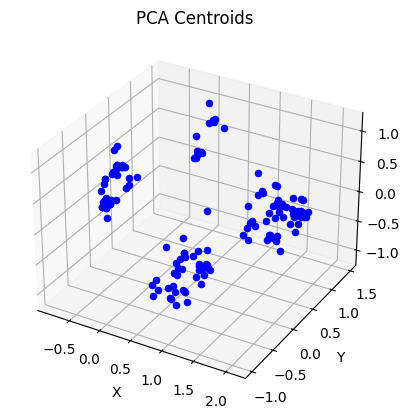

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract X, Y, Z coordinates from each row and plot them
for i, row in grouped_df.iterrows():
    coord = row['ClusterCentoid']
    ax.scatter(coord[0], coord[1], coord[2], c='b', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('PCA Centroids')

plt.show()

In [ ]:
%%bigquery
DELETE FROM patents_processed.thailand_dip_4_clusters WHERE JobId = "job202404090913"

Query is running:   0%|          |

""


In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

job_config = bigquery.LoadJobConfig(

    write_disposition=bigquery.WriteDisposition.WRITE_APPEND,  # Replace existing table
)

toInsert = grouped_df.copy()
toInsert["JobId"] = df_final["JobId"].iloc[0]
toInsert.rename(columns={'ApplicationId': 'PatentApplicationIds'}, inplace=True)
toInsert.rename(columns={'Cluster': 'ClusterLabel'}, inplace=True)

display(toInsert)

job = client.load_table_from_dataframe(toInsert, "curious-pointer-419406.patents_processed.thailand_dip_4_clusters", job_config=job_config)
job.result()

,ClusterLabel,PatentApplicationIds,ClusterCentoid,JobId
0,-1,"[1000157, 1000450, 1001079, 1001232, 1001790, ...","[0.7487817047872128, 0.2500674434177802, 0.059...",job202404090913
1,0,"[1000001, 1000191, 1000714, 1000858, 1000872, ...","[1.9487302783296292, 0.5226170789834418, 0.150...",job202404090913
2,1,"[1000005, 1002170, 201000672, 203000709, 30100...","[0.012054150760400412, -0.4670611914740329, 0....",job202404090913
3,2,"[1000014, 1000535, 1000546, 1000789, 1000809, ...","[1.3839720557591824, -0.850017406851726, -0.01...",job202404090913
4,3,"[1000098, 501004817, 1101001153, 1601006107, 1...","[2.0673919865626704, 0.4326551278011378, 0.141...",job202404090913
...,...,...,...,...
150,149,"[301001332, 1801001618, 8201000193, 8901000279...","[0.9774390918979288, -0.5980247514800902, -0.0...",job202404090913
151,150,"[701004581, 701004925, 801001610, 8501000466, ...","[1.9100287564436351, 0.6836877056283496, 0.114...",job202404090913
152,151,"[303000920, 1501006002, 1603000832, 1603002137...","[-0.319482309572723, -0.28455603017840103, 0.6...",job202404090913
153,152,"[601002560, 2001003618, 9601000228, 9601004231...","[1.2267302192549687, 1.064318040112306, -0.695...",job202404090913


LoadJob<project=curious-pointer-419406, location=asia-southeast1, id=ea2f85db-d597-440b-8581-bc5d1147c92d>

In [ ]:
# @title Create Ready To Use JSON - Clusters
import gzip
from google.cloud import storage

storageClient = storage.Client()

json_data = toInsert.to_json(orient='records')
gzipped_data = gzip.compress(json_data.encode())

bucket = storageClient.get_bucket('prat-config-public')
blob = bucket.blob('patentclusters.json.gz')
blob.upload_from_string(gzipped_data, content_type='application/gzip')

In [ ]:
# @title Create Ready To Use JSON - Data for Each Cluster
from google.cloud import bigquery
import gzip

bq = bigquery.Client()
gcs = storage.Client().get_bucket('prat-config-public')

def getquery( cluster_label):
  return f"""
    SELECT
      raw.*,
      emb.Summary
    FROM
      raw_patents.thailand_dip raw INNER JOIN
      `patents_processed.thailand_dip_3_embeddings` emb
      ON CAST(raw.ApplicationId As String) = emb.ApplicationId
    WHERE
      raw.ApplicationId IN
        (SELECT
          ApplicationId
        FROM
          `{bf.options.bigquery.project}.patents_processed.thailand_dip_4_clusters`,
          UNNEST(PatentApplicationIds) As ApplicationId
        WHERE
          ClusterLabel = {cluster_label})
  """

def bigquery(sql_query):
  query_job = bq.query(sql_query)
  return query_job.result().to_dataframe()


for index, row in grouped_df.iterrows():
  cluster_label = row["Cluster"]
  members = bigquery( getquery( cluster_label ))

  json_data = members.to_json(orient='records', force_ascii=False)
  gzipped_data = gzip.compress(json_data.encode())

  blob = gcs.blob(f'patentcluster_{cluster_label}.json.gz')
  blob.upload_from_string(gzipped_data, content_type='application/gzip')

  print(f"Written: patentcluster_{cluster_label}.json.gz...")


Written: patentcluster_-1.json.gz...
Written: patentcluster_0.json.gz...
Written: patentcluster_1.json.gz...
Written: patentcluster_2.json.gz...
Written: patentcluster_3.json.gz...
Written: patentcluster_4.json.gz...
Written: patentcluster_5.json.gz...
Written: patentcluster_6.json.gz...
Written: patentcluster_7.json.gz...
Written: patentcluster_8.json.gz...
Written: patentcluster_9.json.gz...
Written: patentcluster_10.json.gz...
Written: patentcluster_11.json.gz...
Written: patentcluster_12.json.gz...
Written: patentcluster_13.json.gz...
Written: patentcluster_14.json.gz...
Written: patentcluster_15.json.gz...
Written: patentcluster_16.json.gz...
Written: patentcluster_17.json.gz...
Written: patentcluster_18.json.gz...
Written: patentcluster_19.json.gz...
Written: patentcluster_20.json.gz...
Written: patentcluster_21.json.gz...
Written: patentcluster_22.json.gz...
Written: patentcluster_23.json.gz...
Written: patentcluster_24.json.gz...
Written: patentcluster_25.json.gz...
Written: pa